In [2]:
import sqlalchemy

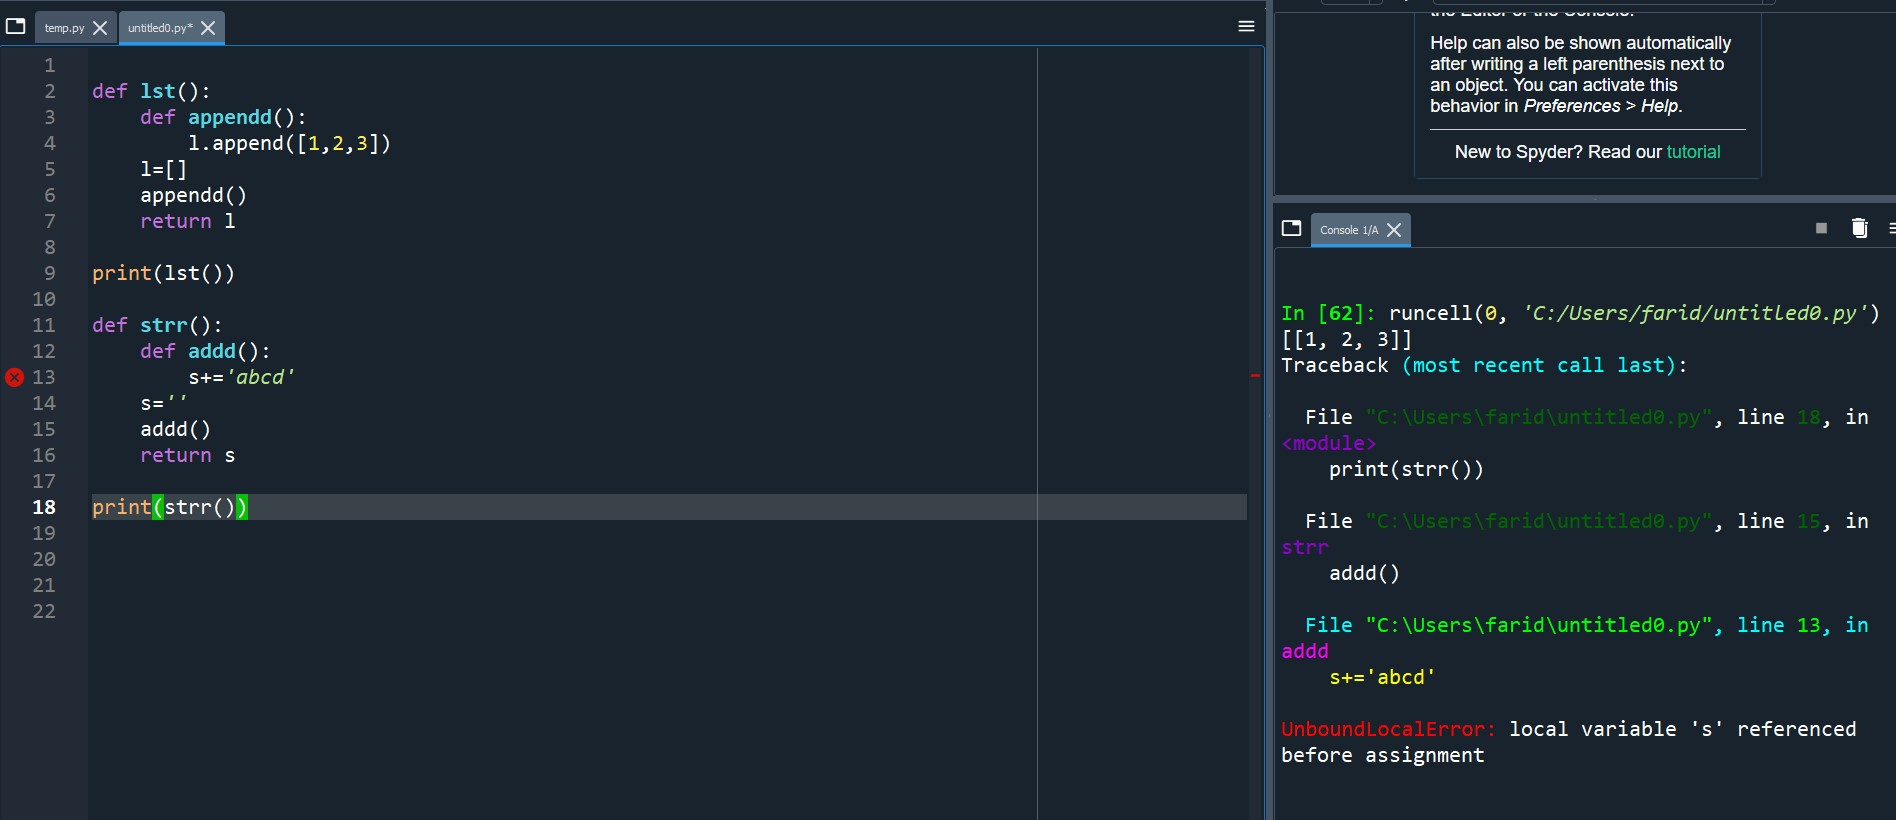

In [7]:
def strr():
    def addd():
        s += 'abcd'
    s = ''
    addd()
    return s


In [13]:
def test():
    l.append(5)
    return l

test()

[5, 5, 5]

In [32]:
from flask import Flask, render_template, request, redirect
from flask_sqlalchemy import SQLAlchemy

app = Flask(__name__, template_folder="templates")
app.config["SQLALCHEMY_DATABASE_URI"] = "sqlite:///database.sqlite3"
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy()
db.init_app(app)
app.app_context().push()


class Enrollment(db.Model):
    __tablename__ = 'enrollments'
    enrollment_id = db.Column(db.Integer, autoincrement=True, primary_key=True)
    estudent_id = db.Column(db.Integer,
                            db.ForeignKey("student.student_id"),
                            nullable=False)
    ecourse_id = db.Column(db.Integer,
                           db.ForeignKey("course.course_id"),
                           nullable=False)

    def __init__(self, estudent_id, ecourse_id):
        self.estudent_id = estudent_id
        self.ecourse_id = ecourse_id


class Student(db.Model):
    __tablename__ = 'student'
    student_id = db.Column(db.Integer, autoincrement=True, primary_key=True)
    roll_number = db.Column(db.String, unique=True, nullable=False)
    first_name = db.Column(db.String, nullable=False)
    last_name = db.Column(db.String, nullable=True)
    c = db.relationship('Course', secondary='enrollments', backref='s')

    def __init__(self, roll_number, first_name, last_name):
        self.roll_number = roll_number
        self.first_name = first_name
        self.last_name = last_name


class Course(db.Model):
    __tablename__ = 'course'
    course_id = db.Column(db.Integer, autoincrement=True, primary_key=True)
    course_code = db.Column(db.String, unique=True, nullable=False)
    course_name = db.Column(db.String, nullable=False)
    course_description = db.Column(db.String)

    def __init__(self, course_code, course_name, course_description):
        self.course_code = course_code
        self.course_name = course_name
        self.course_description = course_description


db.session.commit()


# engine = create_engine("sqlite:///./database.sqlite3")
# session = Session(engine)
def add_record(record):
    try:
        db.session.add(record)
        db.session.commit()
        return True
    except:
        return False


d = [{
    'course_code': 'CSE01',
    'course_name': 'MAD I',
    'course_description': 'Morden Application Development - I'
}, {
    'course_code': 'CSE02',
    'course_name': 'DBMS',
    'course_description': 'Database management Systems'
}, {
    'course_code':
    'CSE03',
    'course_name':
    'PDSA',
    'course_description':
    'Programming, Data Structures and Algorithms using Python'
}, {
    'course_code': 'BST13',
    'course_name': 'BDM',
    'course_description': 'Business Data Management'
}]



@app.route("/", methods=["GET", "POST"])
def home():
    students = Student.query.all()
    if students != []:
        return render_template('home.html', flag=True, students=students)
    else:
        return render_template('home.html', flag=False)


@app.route("/student/create/", methods=["GET", "POST"])
def add_student():
    if request.method == "GET":
        return render_template('addstudent.html', flag=True)

    elif request.method == "POST":
        try:
            roll = request.form['roll']
            fname = request.form['f_name']
            lname = request.form['l_name']
            courses = request.form.getlist('courses')
            record = Student(int(roll), fname, lname)
            status = add_record(record)
            sd_id = Student.query.filter_by(roll_number=roll).first()
            for course in courses:
                c_id = Course.query.filter_by(course_id=course[-1]).first()
                sd_id.c.append(c_id)
                db.session.commit()
        except:
            return render_template('error.html')

        if status:
            return redirect("/")
        return render_template('addstudent.html', flag=False)


@app.route('/student/<int:student_id>/update/', methods=["GET", "POST"])
def update(student_id):

    student = Student.query.filter_by(student_id=student_id).first()

    if request.method == "GET":
        return render_template('update.html', student=student)
    elif request.method == "POST":
        student_to_be_deleted = Student.query.get_or_404(student_id)
        roll = student_to_be_deleted.roll_number
        db.session.delete(student_to_be_deleted)
        db.session.commit()
        fname = request.form['f_name']
        lname = request.form['l_name']
        courses = request.form.getlist('courses')
        record = Student(int(roll), fname, lname)
        add_record(record)
        sd_id = Student.query.filter_by(roll_number=roll).first()
        for course in courses:
            c_id = Course.query.filter_by(course_id=course[-1]).first()
            sd_id.c.append(c_id)
        try:
            db.session.commit()
        except:
            print("FAILED")
        finally:
            return redirect("/")


@app.route('/student/<int:student_id>/delete/', methods=["GET", "POST"])
def delete(student_id):
    if request.method == "GET":
        student_to_be_deleted = Student.query.get_or_404(student_id)
        try:
            db.session.delete(student_to_be_deleted)
            db.session.commit()
        except:
            print("FAILED")
        finally:
            return redirect("/")


@app.route('/student/<int:student_id>/', methods=["GET", "POST"])
def personal(student_id):

    student = Student.query.filter_by(student_id=student_id).first()
    s_c = student.c
    for i in s_c:
        print(i)
    if request.method == "GET":
        return render_template('personal_details.html',
                               student=student,
                               courses=s_c)


app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5004/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Feb/2022 15:39:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2022 15:39:30] "GET /student/create/ HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2022 15:39:37] "POST /student/create/ HTTP/1.1" 302 -
127.0.0.1 - - [06/Feb/2022 15:39:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2022 15:39:39] "GET /student/14/update/ HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2022 15:39:43] "POST /student/14/update/ HTTP/1.1" 302 -
127.0.0.1 - - [06/Feb/2022 15:39:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2022 15:39:45] "GET /student/15/ HTTP/1.1" 200 -


<Course 2>


127.0.0.1 - - [06/Feb/2022 15:39:47] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2022 15:39:49] "GET /student/create/ HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2022 15:39:54] "POST /student/create/ HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2022 15:39:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2022 15:39:57] "GET /student/15/delete/ HTTP/1.1" 302 -
127.0.0.1 - - [06/Feb/2022 15:39:57] "GET / HTTP/1.1" 200 -


In [37]:
def My_func1(a,b):
    sum1 = a+b
    print(sum1) 

def update(original_func):
    def My_func2(*args):
        My_func1(*args)
        a,b = args
        print((a+b)**2)
    return My_func2

My_func_1 = update(My_func1)

In [40]:
My_func_1

'hello'